<a href="https://colab.research.google.com/github/Saniarahmi/202155202020_Sania/blob/master/Copy_of_prediksi_cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests


In [ ]:
import http.client

conn = http.client.HTTPSConnection("weather-api167.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "7e0a38cf01msh8641d0092d796a3p1c5e14jsn792e82575190",
    'x-rapidapi-host': "weather-api167.p.rapidapi.com",
    'Accept': "application/json"
}

conn.request("GET", "/api/weather/forecast?place=London&cnt=3&units=standard&type=three_hour&mode=json&lang=en", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"cod":"200","message":0,"cnt":3,"list":[{"dt":1735462800,"summery":"overcast clouds, 277.47K, feels like 276.03K, winds 1.73 meter/sec from West-Southwest, 95% humidity","main":{"temprature":277.47,"temprature_feels_like":276.03,"temprature_min":277.16,"temprature_max":277.47,"temprature_unit":"K","pressure":1030,"sea_level_pressure":1030,"ground_level_pressure":1025,"pressure_unit":"hPa","humidity":95,"humidity_unit":"%","temp_kf":0.31},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"cloudiness":100,"unit":"%"},"wind":{"speed":1.73,"degrees":242,"gust_speed":2.9,"speed_unit":"meter/sec"},"visibility_distance":10000,"visibility_unit":"m","probability_of_precipitation":0,"probability_of_precipitation_unit":"%","sys":{"part_of_day":"day"},"dt_txt":"2024-12-29 09:00:00"},{"dt":1735473600,"summery":"broken clouds, 278.31K, feels like 276.46K, winds 2.25 meter/sec from West-Southwest, 90% humidity","main":{"temprature":278.31,"temprature_feels

In [ ]:
import requests

# Konfigurasi API
API_HOST = "weather-api167.p.rapidapi.com"  # Ganti sesuai dengan API yang Anda gunakan
API_KEY = "7e0a38cf01msh8641d0092d796a3p1c5e14jsn792e82575190"  # Masukkan API Key Anda
BASE_URL = f"https://{API_HOST}/api/weather/current"


In [ ]:
def get_weather(place, units="metric", lang="en"):
    headers = {
        "x-rapidapi-host": API_HOST,
        "x-rapidapi-key": API_KEY
    }
    params = {
        "place": place,
        "units": units,
        "lang": lang,
        "mode": "json"
    }
    try:
        response = requests.get(BASE_URL, headers=headers, params=params)
        response.raise_for_status()  # Cek apakah respon berhasil
        return response.json()
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}


In [ ]:
def display_weather(data, place):
    if "data" in data:
        weather = data["data"]
        print(f"Weather Data for {place}:")
        print(f"Temperature: {weather.get('temperature', 'N/A')}°C")
        print(f"Condition: {weather.get('weather_description', 'N/A')}")
        print(f"Humidity: {weather.get('humidity', 'N/A')}%")
        print(f"Wind Speed: {weather.get('wind_speed', 'N/A')} m/s")
    else:
        print("Error:", data.get("error", "Unable to fetch weather data."))


In [ ]:
# Masukkan lokasi
place = input("Masukkan lokasi (contoh: London, Jakarta): ")

# Panggil API dan tampilkan data
weather_data = get_weather(place)
display_weather(weather_data, place)


Masukkan lokasi (contoh: London, Jakarta): London
Error: Unable to fetch weather data.


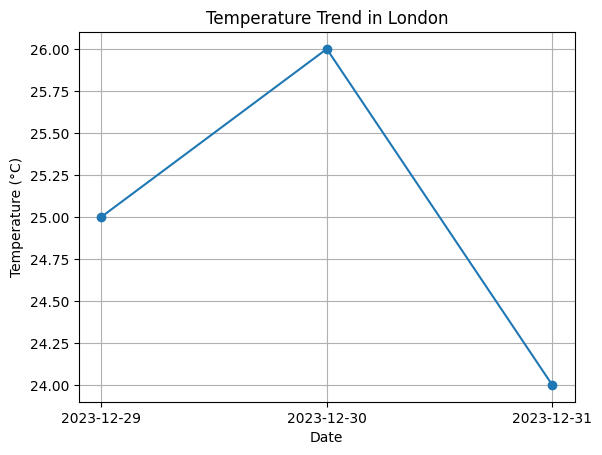

In [ ]:
import matplotlib.pyplot as plt

# Contoh data visualisasi
dates = ["2023-12-29", "2023-12-30", "2023-12-31"]
temperatures = [25, 26, 24]

plt.plot(dates, temperatures, marker='o')
plt.title(f"Temperature Trend in {place}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


In [ ]:
import csv

def save_to_csv(data, filename="weather_data.csv"):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Time", "Temperature", "Condition", "Humidity", "Wind Speed"])
        for forecast in data.get("data", []):
            writer.writerow([
                forecast.get("time", "N/A"),
                forecast.get("temperature", "N/A"),
                forecast.get("weather_description", "N/A"),
                forecast.get("humidity", "N/A"),
                forecast.get("wind_speed", "N/A")
            ])
    print(f"Data saved to {filename}")
